In [1]:
#Project 1 Final code

#Make display charts.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import requests
import time
from us import states
from config import gkey
import gmaps
import scipy.stats as stats
from scipy.stats import pareto
import scipy
import scipy.stats

In [2]:
#Getting the data in a usable form.

# Keeps first row of header and drops the other 2 header rows.
# Drops the blank rows and the total row since it is redundant.
# Fillna(0) and replace.({'**': 0}) replaced NaN and ** values with zeros.
Florida_data= pd.read_excel('Resources/16zp10fl.xls', sheetname='Sheet1', header=3)
Florida_data=Florida_data.drop(Florida_data.index[0:3])
Florida_data=Florida_data.rename(columns= {"ZIP\ncode [1]": "Zip Code"})
Florida_data=Florida_data.dropna(how="all")
Florida_data=Florida_data.dropna(subset=["Size of adjusted gross income"])
Florida_data=Florida_data.fillna(0)
Florida_data=Florida_data.replace({'**': 0})
    
    
# Rename the income brackets.    
Florida_data["Size of adjusted gross income"]= \
Florida_data["Size of adjusted gross income"].replace({ \
          "$1 under $25,000": "Under $25000", 
          "$25,000 under $50,000": "$25000 to $50000",
          "$50,000 under $75,000": "$50,000 to $75,000", 
          "$75,000 under $100,000": "$75,000 to $100,000",
          "$100,000 under $200,000": "$100,000 to $200,000",
          "$200,000 or more": "Over $200,000"
          } 
          )

# Modified Zip Code Excel Sheet.
Florida_zip=pd.read_excel('Resources/Zip_Codes.xlsx')
Florida_zip=Florida_zip.rename(columns={"zip": "Zip Code", "primary_city": "City"})


# Turns Zip Code variable into integers for both sets so it will merge properly.
Florida_data["Zip Code"]=Florida_data["Zip Code"].astype(int)
Florida_zip["Zip Code"]=Florida_zip["Zip Code"].astype(int)


# Merges both on Zip Codes.
Florida_complete=pd.merge(Florida_zip, Florida_data, on='Zip Code')


# Renaming columns - Control + / to uncomment everything
Florida_complete=Florida_complete.rename(columns={                                                  
"Number of volunteer prepared returns [2]": "Total Number of volunteer prepared returns",
"Unnamed: 10": "Number of volunteer income tax assistance prepared returns",                                                  
"Unnamed: 11": "Number of tax counseling for the elderly prepared returns",                                                  
"Unnamed: 12": "Number of volunteer prepared returns with Earned Income Credit",                                                                                                   
"Number of elderly returns [3]": "Number of elderly returns",                                                  
"Adjusted gross income (AGI) [4]": "Adjusted gross income (AGI)",                                                  
"Total income": "Total income: Number of returns",                                                  
"Unnamed: 18": "Total income: Amount",                                                  
"Salaries and wages in AGI": "Salaries and wages in AGI: Number of returns",                                                  
"Unnamed: 20": "Salaries and wages in AGI: Amount",                                                  
"Taxable interest": "Taxable interest: Number of returns",                                                  
"Unnamed: 22": "Taxable interest: Amount",                                                  
"Ordinary dividends": "Ordinary dividends: Number of returns",                                                  
"Unnamed: 24": "Ordinary dividends: Amount",                                                  
"Qualified dividends [5]": "Qualified dividends: Number of returns",                                                  
"Unnamed: 26": "Qualified dividends: Amount",                                                  
"State and local income tax refunds\n": "State and local income tax refunds: Number of returns",                                                  
"Unnamed: 28": "State and local income tax refunds: Number of returns",                                                  
"Business or profession\net income": "Business or profession net income: Number of returns",                                                  
"Unnamed: 30": "Business or profession net income: Amount",
"Net capital gain (less loss) in AGI": "Net capital gain in AGI: Number of returns",                                                  
"Unnamed: 32": "Net capital gain in AGI: Amount",                                                  
"Taxable individual retirement\narrangement distributions": "Taxable individual retirement arrangement distributions: Number of returns",                                                  
"Unnamed: 34": "Taxable individual retirement arrangement distributions: Amount",                                                  
"Pensions and annuities in AGI": "Pensions and annuities in AGI: Number of returns",                                                  
"Unnamed: 36": "Pensions and annuities in AGI: Amount",                                                  
"Number of \nfarm returns": "Number of farm returns",
"Business or profession\nnet income (less loss)":"Business or profession net income: Number of returns",
"Unemployment compensation [6]": "Unemployment compensation: Number of returns",
"Unnamed: 39": "Unemployment compensation: Amount",
"Taxable Social Security benefits": "Taxable Social Security benefits: Number of returns",                                                  
"Unnamed: 41": "Taxable Social Security benefits: Amount",                                                  
"Partnership/S-corp net income (less loss)": "Partnership/S-corp net income: Number of returns",                                                  
"Unnamed: 43": "Partnership/S-corp net income: Amount",                                                  
"Total statuory adjustments": "Total statuory adjustments: Number of returns",                                                  
"Unnamed: 45": "Total statuory adjustments: Amount",                                                  
"Educator expenses": "Educator expenses: Number of returns",                                                  
"Unnamed: 47": "Educator expenses: Amount",                                                  
"Self-employed (Keogh) retirement plans": "Self-employed (Keogh) retirement plans: Number of returns",                                                  
"Unnamed: 49": "Self-employed (Keogh) retirement plans: Amount",                                                  
"Self-employed health insurance deduction": "Self-employed health insurance deduction: Number of returns",
"Unnamed: 51": "Self-employed health insurance deduction: Amount",                                                  
"Individual retirement arrangement payments": "Individual retirement arrangement payments: Number of returns",                                                  
"Unnamed: 53": "Individual retirement arrangement payments: Amount",                                                  
"Student loan interest deduction": "Student loan interest deduction: Number of returns",                                                  
"Unnamed: 55": "Student loan interest deduction: Amount",                                                  
"Tuition and fees deduction": "Tuition and fees deduction: Number of returns",                                                  
"Unnamed: 57": "Tuition and fees deduction: Amount",                                                  
"Domestic production activities deduction": "Domestic production activities deduction: Number of returns",                                                  
"Unnamed: 59": "Domestic production activities deduction: Amount",                                                  
"Total itemized deductions": "Total itemized deductions: Number of returns",                                                  
"Unnamed: 61": "Total itemized deductions: Amount",
"Unnamed: 62": "Total itemized deductions: Amount of AGI",
"Total medical and dental \nexpenses deduction": "Total medical and dental expenses deduction: Number of returns",
"Unnamed: 64": "Total medical and dental expenses deduction: Amount",                                                  
"State and local income taxes": "State and local income taxes: Number of returns",                                                  
"Unnamed: 66": "State and local income taxes: Amount",                                                  
"State and local general sales taxes": "State and local general sales taxes: Number of returns",                                                  
"Unnamed: 68": "State and local general sales taxes: Amount",                                                  
"Real estate taxes": "Real estate taxes: Number of returns",                                                  
"Unnamed: 70": "Real estate taxes: Amount",                                                  
"Personal property taxes": "Personal property taxes: Number of returns",                                                  
"Unnamed: 72": "Personal property taxes: Amount",                                                  
"Total taxes paid": "Total taxes paid: Number of returns",                                                  
"Unnamed: 74": "Total taxes paid: Amount",
"Home mortgage interest paid ": "Home mortgage interest paid: Number of returns",
"Unnamed: 76": "Home mortgage interest paid: Amount",                                                  
"Home mortgage interest paid \nfrom personal seller": "Home mortgage interest paid from personal seller: Number of returns",                                                  
"Unnamed: 78": "Home mortgage interest paid from personal seller: Amount",                                                  
"Deductible points": "Deductible points: Number of returns",                                                  
"Unnamed: 80": "Deductible points: Amount",                                                  
"Qualified mortgage insurance premiums": "Qualified mortgage insurance premiums: Number of returns",                                                  
"Unnamed: 82": "Qualified mortgage insurance premiums: Amount",                                                  
"Investment interest paid": "Investment interest paid: Number of returns",                                                  
"Unnamed: 84": "Investment interest paid: Amount",                                                  
"Total charitable contributions": "Total charitable contributions: Number of returns",                                                  
"Unnamed: 86": "Total charitable contributions: Amount",
"Net limited miscellaneous deduction": "Net limited miscellaneous deduction: Number of returns",
"Unnamed: 88": "Net limited miscellaneous deduction: Amount",                                                  
"Other non-limited \nmiscellaneous deduction": "Other non-limited miscellaneous deduction: Number of returns",                                                  
"Unnamed: 90": "Other non-limited miscellaneous deduction: Amount",                                                  
"Taxable income": "Taxable income: Number of returns",                                                  
"Unnamed: 92": "Taxable income: Amount",                                                  
"ncome tax before credits": "ncome tax before credits: Number of returns",                                                  
"Unnamed: 94": "ncome tax before credits: Amount",                                                  
"Alternative minimum tax": "Alternative minimum tax: Number of returns",                                                  
"Unnamed: 96": "Alternative minimum tax: Amount",                                                  
"Excess advance \npremium tax credit repayment": "Excess advance premium tax credit repayment: Number of returns",                                                  
"Unnamed: 98": "Excess advance premium tax credit repayment: Amount",
"Total tax credits": "Total tax credits: Number of returns",
"Unnamed: 100": "Total tax credits: Amount",                                                  
"Foreign tax credit": "Foreign tax credit: Number of returns",                                                  
"Unnamed: 102": "Foreign tax credit: Amount",                                                  
"Child and dependent care credit": "Child and dependent care credit: Number of returns",                                                  
"Unnamed: 104": "Child and dependent care credit: Amount",                                                  
"Nonrefundable education credit": "Nonrefundable education credit: Number of returns",                                                  
"Unnamed: 106": "Nonrefundable education credit: Amount",                                                  
"Retirement savings contributions credit": "Retirement savings contributions credit: Number of returns",                                                  
"Unnamed: 108": "Retirement savings contributions credit: Amount",                                                  
"Child tax credit": "Child tax credit: Number of returns",                                                  
"Unnamed: 110": "Child tax credit: Amount",
"Residential energy tax credit": "Residential energy tax credit: Number of returns",
"Unnamed: 112": "Residential energy tax credit: Amount",                                                  
"Self-employment tax": "Self-employment tax: Number of returns",                                                  
"Unnamed: 114": "Self-employment tax: Amount",                                                  
"Total premium tax credit": "Total premium tax credit: Number of returns",                                                  
"Unnamed: 116": "Total premium tax credit: Amount",                                                  
"Advance premium tax credit": "Advance premium tax credit: Number of returns",                                                  
"Unnamed: 118": "Advance premium tax credit: Amount",                                                  
"Health care individual \nresponsibility payment": "Health care individual responsibility payment: Number of returns",           
"Unnamed: 120": "Health care individual responsibility payment: Amount",                                                  
"Total tax payments": "Total tax payments: Number of returns",            
"Unnamed: 122": "Total tax payments: Amount",                                                  
"Earned income credit [7]": "Earned income credit: Number of returns",                                                  
"Unnamed: 124": "Earned income credit: Amount",
"Excess earned income credit \n(refundable) [8]": "Excess earned income credit (refundable): Number or returns",
"Unnamed: 126": "Excess earned income credit (refundable): Amount",                                                  
"Additional child tax credit": "Additional child tax credit: Number of returns",                                                  
"Unnamed: 128": "Additional child tax credit: Amount",                                                  
"Refundable education credit": "Refundable education credit: Number of returns",                                                  
"Unnamed: 130": "Refundable education credit: Amount",                                                  
"Net premium tax credit": "Net premium tax credit: Number of returns",                                                  
"Unnamed: 132": "Net premium tax credit: Amount",                                                  
"Income tax [9]": "Income tax: Number of returns",                                                  
"Unnamed: 134": "Income tax: Amount",                                                  
"Total tax liability [10]": "Total tax liability: Number of returns",                                                  
"Unnamed: 136": "Total tax liability: Amount",
"Total additional Medicare tax": "Total additional Medicare tax: Number of returns",
"Unnamed: 138": "Total additional Medicare tax: Amount",                                                  
"Net investment income tax": "Net investment income tax: Number of returns",                                                  
"Unnamed: 140": "Net investment income tax: Amount",                                                  
"Tax due at time of filing [11]": "Tax due at time of filing: Number of returns",                                                  
"Unnamed: 142": "Tax due at time of filing: Amount",                                                  
"Overpayments refunded [12]": "Overpayments refunded: Number of returns",                                                  
"Unnamed: 144": "Overpayments refunded: Amount",                                                  
}
)

# Florida complete contains zip codes and cities.
# Drops zip codes to just yield cities.
Florida_cities=Florida_complete
Florida_cities=Florida_cities.drop("Zip Code", axis=1)

In [6]:
#Florida_cities is the main dataframe is use.

Florida_cities=Florida_complete
Florida_cities=Florida_cities.drop("Zip Code", axis=1)
Florida_cities=Florida_cities.groupby([ \
                "City", "Size of adjusted gross income"], sort=False).sum().reset_index()



Florida_cities.head(10)

,City,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Total Number of volunteer prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
0,Fleming Island,Under $25000,3470.0,2780.0,340.0,300.0,1200.0,3340.0,750.0,80,...,1670,1372,0,0,0,0,300,231,2890,4093
1,Fleming Island,$25000 to $50000,2200.0,1110.0,620.0,390.0,870.0,4020.0,1210.0,30,...,1880,5091,0,0,0,0,380,626,1780,4536
2,Fleming Island,"$50,000 to $75,000",1860.0,640.0,890.0,270.0,830.0,4100.0,1350.0,50,...,1770,9734,0,0,0,0,470,1037,1340,4073
3,Fleming Island,"$75,000 to $100,000",1520.0,280.0,1080.0,120.0,670.0,3870.0,1270.0,0,...,1510,13047,0,0,0,0,430,1147,1060,3588
4,Fleming Island,"$100,000 to $200,000",2930.0,240.0,2580.0,110.0,1320.0,8400.0,2900.0,0,...,2930,52720,0,0,0,0,1120,4194,1730,6898
5,Fleming Island,"Over $200,000",990.0,50.0,900.0,30.0,640.0,3040.0,1150.0,0,...,990,83779,440,537,450,898,500,12766,400,3984
6,Branford,Under $25000,870.0,480.0,170.0,200.0,350.0,1390.0,430.0,30,...,410,372,0,0,0,0,70,48,730,1669
7,Branford,$25000 to $50000,580.0,230.0,220.0,100.0,250.0,1190.0,390.0,0,...,470,1164,0,0,0,0,70,92,500,1431
8,Branford,"$50,000 to $75,000",300.0,80.0,190.0,40.0,170.0,660.0,180.0,0,...,280,1569,0,0,0,0,60,129,230,602
9,Branford,"$75,000 to $100,000",160.0,30.0,140.0,0.0,90.0,430.0,130.0,0,...,160,1326,0,0,0,0,40,113,120,412


In [7]:
# Florida_cities but indexed for display purposes.

Florida_cities_indexed=Florida_complete
Florida_cities_indexed=Florida_cities_indexed.drop("Zip Code", axis=1)
Florida_cities_indexed=Florida_cities_indexed.groupby([\
                        "City", "Size of adjusted gross income"], sort=False).sum()



Florida_cities_indexed

Number of returns  \
City           Size of adjusted gross income                      
Fleming Island Under $25000                              3470.0   
               $25000 to $50000                          2200.0   
               $50,000 to $75,000                        1860.0   
               $75,000 to $100,000                       1520.0   
               $100,000 to $200,000                      2930.0   
               Over $200,000                              990.0   
Branford       Under $25000                               870.0   
               $25000 to $50000                           580.0   
               $50,000 to $75,000                         300.0   
               $75,000 to $100,000                        160.0   
               $100,000 to $200,000                       140.0   
               Over $200,000                               20.0   
Bryceville     Under $25000                               410.0   
               $25000 to $50000                           350.0   
               $50,000 to $75,000                         260.0   
               $75,000 to $100,000                        190.0   
               $100,000 to $200,000                       190.0   
               Over $200,000                               30.0   
Callahan       Under $25000                              2210.0   
               $25000 to $50000                          1710.0   
               $50,000 to $75,000                        1050.0   
               $75,000 to $100,000                        760.0   
               $100,000 to $200,000                       880.0   
               Over $200,000                              100.0   
Lake City      Under $25000                              9550.0   
               $25000 to $50000                          6000.0   
               $50,000 to $75,000                        2780.0   
               $75,000 to $100,000                       1570.0   
               $100,000 to $200,000                      1550.0   
               Over $200,000                              310.0   
...                                                         ...   
Indiantown     Under $25000                              1820.0   
               $25000 to $50000                          1070.0   
               $50,000 to $75,000                         300.0   
               $75,000 to $100,000                        130.0   
               $100,000 to $200,000                       130.0   
               Over $200,000                                0.0   
Jensen Beach   Under $25000                              3740.0   
               $25000 to $50000                          2350.0   
               $50,000 to $75,000                        1450.0   
               $75,000 to $100,000                       1100.0   
               $100,000 to $200,000                      1700.0   
               Over $200,000                              550.0   
Okeechobee     Under $25000                              6960.0   
               $25000 to $50000                          4610.0   
               $50,000 to $75,000                        1800.0   
               $75,000 to $100,000                       1050.0   
               $100,000 to $200,000                      1310.0   
               Over $200,000                              220.0   
Palm City      Under $25000                              3820.0   
               $25000 to $50000                          2400.0   
               $50,000 to $75,000                        1700.0   
               $75,000 to $100,000                       1470.0   
               $100,000 to $200,000                      3140.0   
               Over $200,000                             1740.0   
Stuart         Under $25000                             12180.0   
               $25000 to $50000                          7590.0   
               $50,000 to $75,000                        4310.0   
               $75,000 to 

In [8]:
# Question 1.
# Lower income on a heat map.
Lower_bracket=Florida_cities.loc[ \
(Florida_cities["Number of returns"]>100000) & (Florida_cities["Size of adjusted gross income"]=="Under $25000"),:]

Lower_bracket

,City,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Total Number of volunteer prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
378,Jacksonville,Under $25000,160460.0,101290.0,15380.0,40700.0,64860.0,246290.0,88030.0,6580,...,80120,75216,0,0,0,0,12440,10675,141830,352045
1170,Orlando,Under $25000,215530.0,139070.0,21420.0,51880.0,111700.0,328410.0,116770.0,3190,...,110920,106510,0,0,0,0,18660,16946,188750,491770
1374,Miami,Under $25000,418500.0,267380.0,48950.0,96550.0,295380.0,625310.0,202240.0,6150,...,247200,258130,0,0,0,0,65450,59288,335280,866524
1392,Fort Lauderdale,Under $25000,162930.0,108500.0,16790.0,35030.0,111560.0,235410.0,76510.0,2660,...,87460,88128,0,0,0,0,20420,19485,132100,336029
1656,Tampa,Under $25000,150780.0,97700.0,14460.0,36420.0,67470.0,227510.0,79240.0,2710,...,77160,75672,0,0,0,0,14690,13683,129790,320303


In [9]:
# Question 2.
# Middle income on a heat map.

Middle_bracket=Florida_cities.loc[ \
(Florida_cities["Number of returns"]>75000) & (Florida_cities["Size of adjusted gross income"]!="Under $25000") & \
(Florida_cities["Size of adjusted gross income"]!="$100,000 to $200,000") & \
(Florida_cities["Size of adjusted gross income"]!="Over $200,000"),:]

Middle_bracket=Middle_bracket.groupby(["City"]).sum().reset_index()

Middle_bracket

,City,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Total Number of volunteer prepared returns,Number of volunteer income tax assistance prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
0,Fort Lauderdale,97640.0,52420.0,18550.0,23630.0,62610.0,171550.0,55880.0,1040,910,...,81500,213519,0,0,0,0,13910,26137,82120,239803
1,Jacksonville,112330.0,57630.0,23410.0,26950.0,41560.0,205360.0,70000.0,4220,2620,...,92540,244146,0,0,0,0,14980,22698,96470,261537
2,Miami,302450.0,146340.0,73030.0,75000.0,209210.0,559510.0,185070.0,2100,1880,...,263630,920830,0,0,0,0,45360,112055,253710,792141
3,Orlando,123530.0,64060.0,25630.0,30010.0,58470.0,229090.0,80470.0,1350,560,...,100840,262053,0,0,0,0,15580,26694,107110,306814
4,Tampa,93790.0,51390.0,17080.0,22550.0,36860.0,166030.0,55600.0,1440,790,...,78170,211759,0,0,0,0,12780,21774,80130,214439


In [10]:
# Question 3.
# Upper Income on a heat map.

Upper_bracket=Florida_cities.loc[ \
(Florida_cities["Number of returns"]>75000) & (Florida_cities["Size of adjusted gross income"]!="Under $25000") & \
(Florida_cities["Size of adjusted gross income"]!="$25000 to $50000") & \
(Florida_cities["Size of adjusted gross income"]!="$50,000 to $75,000") & \
(Florida_cities["Size of adjusted gross income"]!="$75,000 to $100,000"),:]

Upper_bracket=Middle_bracket.groupby(["City"]).sum().reset_index()

Upper_bracket

,City,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Total Number of volunteer prepared returns,Number of volunteer income tax assistance prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
0,Fort Lauderdale,97640.0,52420.0,18550.0,23630.0,62610.0,171550.0,55880.0,1040,910,...,81500,213519,0,0,0,0,13910,26137,82120,239803
1,Jacksonville,112330.0,57630.0,23410.0,26950.0,41560.0,205360.0,70000.0,4220,2620,...,92540,244146,0,0,0,0,14980,22698,96470,261537
2,Miami,302450.0,146340.0,73030.0,75000.0,209210.0,559510.0,185070.0,2100,1880,...,263630,920830,0,0,0,0,45360,112055,253710,792141
3,Orlando,123530.0,64060.0,25630.0,30010.0,58470.0,229090.0,80470.0,1350,560,...,100840,262053,0,0,0,0,15580,26694,107110,306814
4,Tampa,93790.0,51390.0,17080.0,22550.0,36860.0,166030.0,55600.0,1440,790,...,78170,211759,0,0,0,0,12780,21774,80130,214439


In [44]:
# Question 4-7 dataframes.
# Retirement information.
# Total =   Pensions and annuities in AGI +
#           Taxable Social Security benefits +
#           Individual retirement arrangement payments


Retirement_returns=City_tax_test[[ \
    "City",
    "Pensions and annuities in AGI: Number of returns", 
    "Taxable Social Security benefits: Number of returns",
    "Individual retirement arrangement payments: Number of returns"]
    ]


Retirement_returns["Total"]=( \
Retirement_returns["Pensions and annuities in AGI: Number of returns"] + \
Retirement_returns["Taxable Social Security benefits: Number of returns"] + \
Retirement_returns["Individual retirement arrangement payments: Number of returns"]
)


Retirement_returns=Retirement_returns[["City", "Total"]]


Retirement_amount=City_tax_test[[ \
    "City",
    "Pensions and annuities in AGI: Amount", 
    "Taxable Social Security benefits: Amount",
    "Individual retirement arrangement payments: Amount"]
    ]


Retirement_amount["Total"]=( \
Retirement_amount["Pensions and annuities in AGI: Amount"] + \
Retirement_amount["Taxable Social Security benefits: Amount"] + \
Retirement_amount["Individual retirement arrangement payments: Amount"]
)


Retirement_amount=Retirement_amount[["City", "Total"]]
Retirement_amount["Total"]=Retirement_amount["Total"]*1000


C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [45]:
# Question 4
# Cities with total retirement returns over 50,000.  11 cities total.

High_retire_returns=  \
    Retirement_returns.loc[Retirement_returns["Total"]>50000,:]

High_retire_returns

,City,Total
34,Bradenton,53810
110,Fort Lauderdale,102720
113,Fort Myers,57480
167,Jacksonville,125950
228,Miami,145910
245,Naples,81150
272,Orlando,93780
303,Pompano Beach,57040
325,Saint Petersburg,63220
332,Sarasota,64200


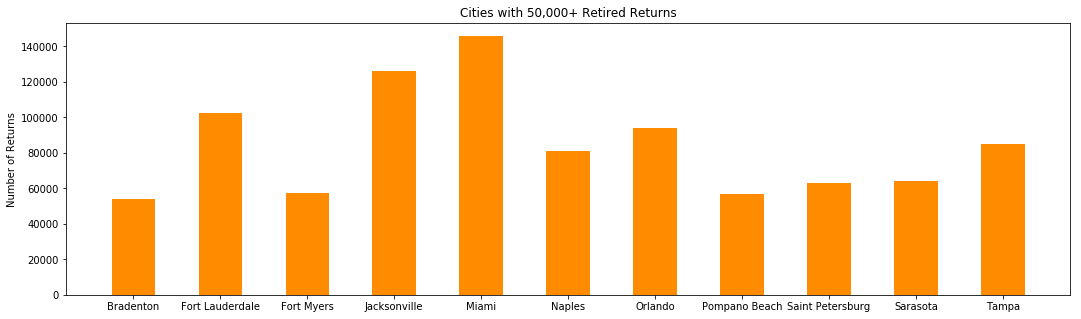

In [46]:
# Question 4 graph.

plt.figure(figsize=(18,5))
High_retire_returns_graph=plt.bar( \
High_retire_returns["City"], High_retire_returns["Total"], color="darkorange", width=0.5)


plt.title("Cities with 50,000+ Retired Returns")
plt.ylabel("Number of Returns")
plt.savefig("50000+ Retired Returns")
plt.show()

In [68]:
# Question 5.
# Cities with $100+ million in retirement income. 16 cities in total.

High_retire_amount= \
Retirement_amount.loc[Retirement_amount["Total"]>1000000000,:]
High_retire_amount_display=High_retire_amount


High_retire_amount_display["Total"]= \
High_retire_amount_display["Total"].astype(float).map("${:20,.0f}".format)

High_retire_amount_display

C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,City,Total
28,Boca Raton,"$ 1,031,967,000"
33,Boynton Beach,"$ 1,038,636,000"
34,Bradenton,"$ 1,181,783,000"
110,Fort Lauderdale,"$ 1,938,618,000"
113,Fort Myers,"$ 1,306,817,000"
167,Jacksonville,"$ 2,422,324,000"
228,Miami,"$ 2,546,845,000"
245,Naples,"$ 2,092,829,000"
272,Orlando,"$ 1,563,765,000"
294,Pensacola,"$ 1,013,634,000"


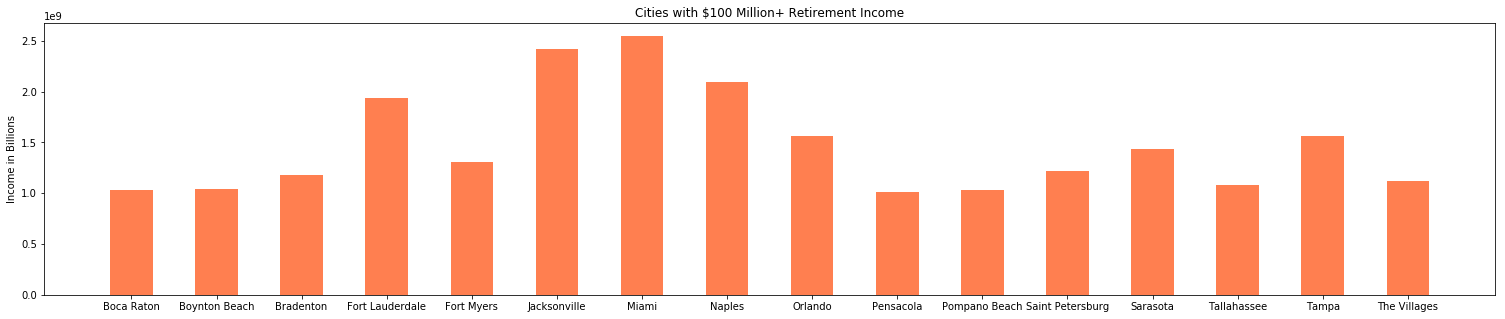

In [48]:
# Question 5 graph.

plt.figure(figsize=(26,5))
High_retire_amount_graph=plt.bar(  \
High_retire_amount["City"], High_retire_amount["Total"], color="coral", width=0.5)

plt.title("Cities with $100 Million+ Retirement Income")
plt.ylabel("Income in Billions")
plt.savefig("100+ Million Retirement Income")
plt.show()

In [49]:
#Question 6.
#Retirement returns based on zip codes.

Retire_return_zip=Florida_complete[[ \
    "Zip Code",
    "City",
    "Pensions and annuities in AGI: Number of returns", 
    "Taxable Social Security benefits: Number of returns",
    "Individual retirement arrangement payments: Number of returns"]
    ]

Retire_return_zip["Total"]=( \
Retire_return_zip["Pensions and annuities in AGI: Number of returns"] + \
Retire_return_zip["Taxable Social Security benefits: Number of returns"] + \
Retire_return_zip["Individual retirement arrangement payments: Number of returns"]
)

Retire_return_zip=Retire_return_zip[["Zip Code", "City", "Total"]]
Retire_return_zip=Retire_return_zip.merge(Zip_coord, on="Zip Code")

Retire_return_zip_high=Retire_return_zip.loc[Retire_return_zip["Total"]>3000, :]

gmaps.configure(api_key=gkey)

Locations=Retire_return_zip_high[["Latitude", "Longitude"]].astype(float)
Retire_returns=Retire_return_zip_high["Total"].astype(float)

fig=gmaps.figure()

Retire_return_map=gmaps.heatmap_layer(Locations, weights=Retire_returns, 
                                 dissipating=False, max_intensity=15000,
                                 point_radius = 1)

fig.add_layer(Retire_return_map)
fig

C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Figure(layout=FigureLayout(height='420px'))

In [50]:
# Question 7
# Retirement income by zip codes

Retire_amount_zip=Florida_complete[[ \
    "Zip Code",
    "City",
    "Pensions and annuities in AGI: Amount", 
    "Taxable Social Security benefits: Amount",
    "Individual retirement arrangement payments: Amount"]
    ]

Retire_amount_zip["Total"]=( \
Retire_amount_zip["Pensions and annuities in AGI: Amount"] + \
Retire_amount_zip["Taxable Social Security benefits: Amount"] + \
Retire_amount_zip["Individual retirement arrangement payments: Amount"]
)

Retire_amount_zip=Retire_amount_zip[["Zip Code", "City", "Total"]]
Retire_amount_zip=Retire_amount_zip.merge(Zip_coord, on="Zip Code")
Retire_amount_zip["Total"]=Retire_amount_zip["Total"]*1000

Retire_amount_zip_high=Retire_amount_zip.loc[Retire_amount_zip["Total"]>100000000, :]

gmaps.configure(api_key=gkey)

Locations=Retire_amount_zip_high[["Latitude", "Longitude"]].astype(float)
Retire_amount=Retire_amount_zip_high["Total"].astype(float)

fig=gmaps.figure()

Retire_amount_map=gmaps.heatmap_layer(Locations, weights=Retire_amount, 
                                 dissipating=False, max_intensity=500000000,
                                 point_radius = 1)

fig.add_layer(Retire_amount_map)
fig

C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Figure(layout=FigureLayout(height='420px'))

In [11]:
# 7) See if more returns yields more scholarships. - cannot do.
# 8) Get data for entire state - DONE
# 9) Compare Unemployment compensation and taxable social security benefits - cannot do
# 10) 10) Chart pensions and annuities by zip code to determine retirement areas - Done
# 11) Compare taxable income amount vs taxable number of returns by income bracket. - DONE
# 12) Chart heat map of all cities that paid $100 million+ in taxes - Done
# 13) Compare total income to total taxable income - Done
# 14) Total all Returns or incomes and do some statistical analysis - look at thursday lecture

In [31]:
# Question 8.
# Compare top 5 city data against the entire state.

City_tax_test=Florida_cities.groupby(["City"]).sum().reset_index()
Miami_index=City_tax_test[City_tax_test["City"]=="Miami"].index[0]
Orlando_index=City_tax_test[City_tax_test["City"]=="Orlando"].index[0]
Ftl_index=City_tax_test[City_tax_test["City"]=="Fort Lauderdale"].index[0]
Tampa_index=City_tax_test[City_tax_test["City"]=="Tampa"].index[0]
Jack_index=City_tax_test[City_tax_test["City"]=="Jacksonville"].index[0]

Top_five_tax=City_tax_test.iloc[[ \
            Miami_index, Orlando_index, Ftl_index, Tampa_index, Jack_index]
            ]


Top_five_tax=Top_five_tax[[  \
    "City", "Number of returns", "Taxable income: Amount", "Total taxes paid: Amount"]
    ]


Florida_tax_total1=Florida_tax_total[[ \
        "City", "Number of returns", "Taxable income: Amount", "Total taxes paid: Amount"]
        ]


Florida_tax_total1["City"]="Total"


Top_five_tax["Percentage of total returns"]= \
    Top_five_tax["Number of returns"]/Florida_tax_total1["Number of returns"]


Top_five_tax["Taxable income: Percentage amount"]= \
    Top_five_tax["Taxable income: Amount"]/Florida_tax_total1["Taxable income: Amount"]


Top_five_tax["Total taxes paid: Percentage amount"]= \
    Top_five_tax["Total taxes paid: Amount"]/Florida_tax_total1["Total taxes paid: Amount"]


Top_five_tax

,City,Number of returns,Taxable income: Amount,Total taxes paid: Amount,Percentage of total returns,Taxable income: Percentage amount,Total taxes paid: Percentage amount
228,Miami,861990.0,32521847,1267500,0.092498,0.076721,0.081003
272,Orlando,466060.0,15291798,444988,0.050012,0.036074,0.028438
110,Fort Lauderdale,397550.0,20654426,816362,0.042660,0.048725,0.052172
355,Tampa,359410.0,16637257,469492,0.038568,0.039248,0.030004
167,Jacksonville,405640.0,14852767,392588,0.043528,0.035039,0.025089


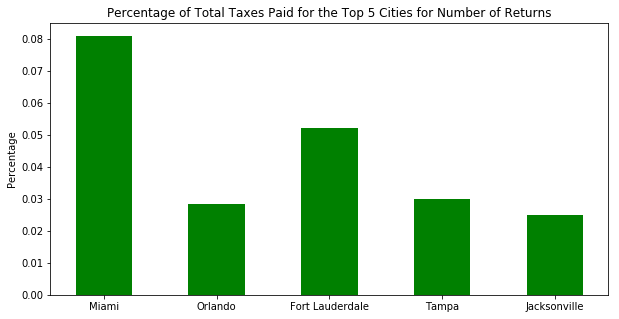

In [32]:
# Question 8 Graph 

plt.figure(figsize=(10,5))
Top_five_tax_plot=plt.bar( \
Top_five_tax["City"], Top_five_tax["Total taxes paid: Percentage amount"], color="green", width=0.5)

plt.title("Percentage of Total Taxes Paid for the Top 5 Cities for Number of Returns")
plt.ylabel("Percentage")
plt.savefig("Top 5 Tax Percentages")
plt.show()

In [40]:
# Question 9
# Cities that paid $100+ million in taxes. 18 cities total.

High_tax_paid=Florida_cities.loc[Florida_cities["Total taxes paid: Amount"]>100000,:]
High_tax_paid=High_tax_paid.groupby(["City"]).sum().reset_index()
High_tax_paid=High_tax_paid[["City", "Total taxes paid: Amount"]]
High_tax_paid["Total taxes paid: Amount"]=High_tax_paid["Total taxes paid: Amount"]*1000
High_tax_paid

,City,Total taxes paid: Amount
0,Boca Raton,345928000
1,Bonita Springs,117268000
2,Delray Beach,195914000
3,Fort Lauderdale,551471000
4,Fort Myers,106295000
5,Jacksonville,228140000
6,Jupiter,172753000
7,Miami,1202988000
8,Miami Beach,290601000
9,Naples,690340000


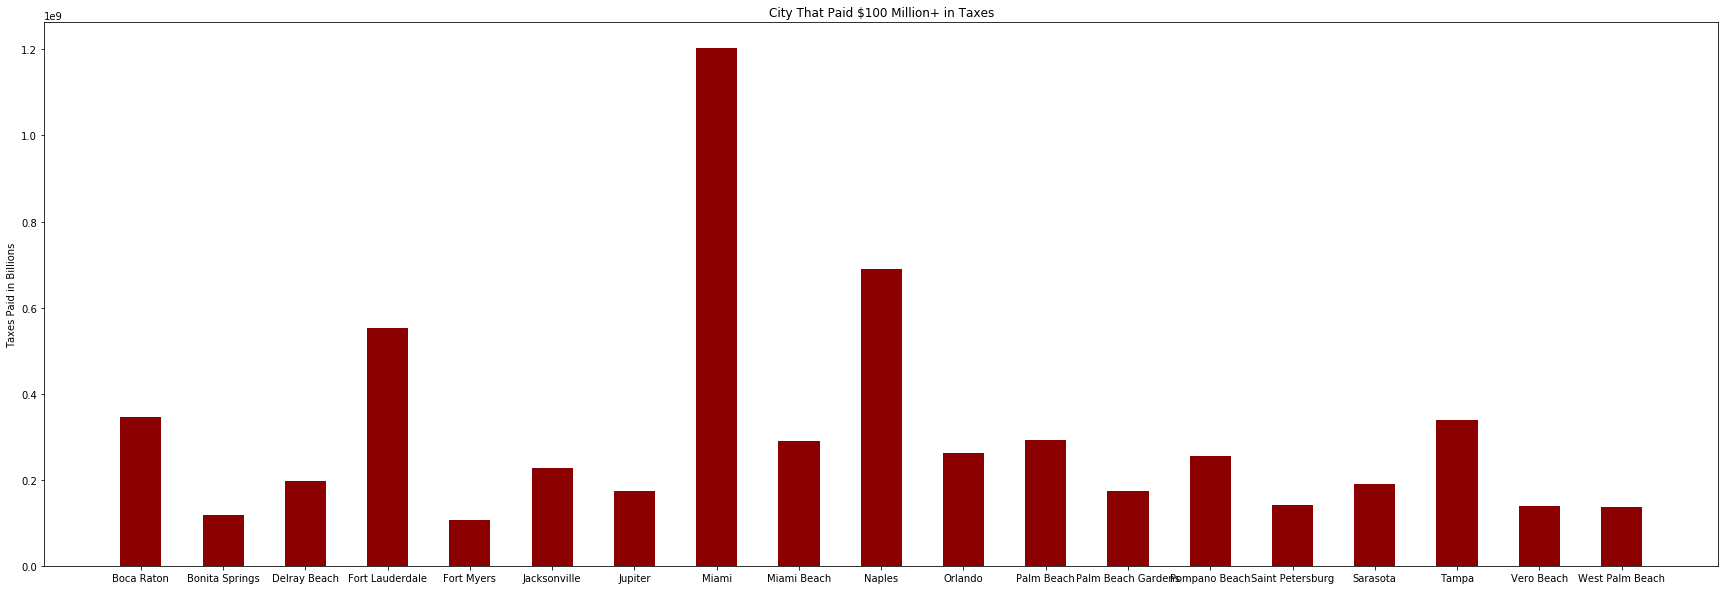

In [42]:
# Question 9 graph

plt.figure(figsize=(30,10))
High_tax_bar=plt.bar(High_tax_paid["City"], High_tax_paid["Total taxes paid: Amount"], \
                    color="darkred",  width=0.5)

plt.ylabel("Taxes Paid in Billions")
plt.title("City That Paid $100 Million+ in Taxes")
plt.savefig("100+ Million Paid")
plt.show()

In [43]:
# Question 10.
# Taxes paid referenced by zip codes instead of city.
# Heat map.

Zip_coord=pd.read_csv('Resources/zipcode.csv', encoding="utf-8")
Zip_coord=Zip_coord[["zip", "latitude", "longitude"]]
Zip_coord=Zip_coord.rename(columns={ \
            "zip": "Zip Code", "latitude": "Latitude", "longitude": "Longitude"})

High_tax_zip=Florida_complete.loc[Florida_complete["Total taxes paid: Amount"]>50000,:]
High_tax_zip=High_tax_zip[["Zip Code", "City", "Total taxes paid: Amount"]]

High_tax_coord=pd.merge(High_tax_zip, Zip_coord, on="Zip Code")

gmaps.configure(api_key=gkey)

Locations=High_tax_coord[["Latitude", "Longitude"]].astype(float)
Taxes_paid=High_tax_coord["Total taxes paid: Amount"].astype(float)

fig=gmaps.figure()

Tax_map= gmaps.heatmap_layer(Locations, weights=Taxes_paid, 
                                 dissipating=False, max_intensity=500000,
                                 point_radius = 1)

fig.add_layer(Tax_map)
fig

Figure(layout=FigureLayout(height='420px'))

In [51]:
# Question 11.
# Which bracket is paying the taxes?

Florida_tax_amount=Florida_cities.groupby([ \
                        "Size of adjusted gross income"], sort=False).sum().reset_index()



Florida_tax_amount=Florida_tax_amount[[ \
            "Number of returns", "Taxable income: Amount", "Total taxes paid: Amount"]]



Florida_tax_amount.insert(0, "Size of adjusted gross income", \
    ("Under $25,000", "$25,000 to $50,000", "$50,000 to $75,000", \
    "$75,000 to $100,000", "$100,000 to $200,000", "Over $200,000")
    )


Florida_tax_total=Florida_tax_amount.sum()
Florida_tax_total["Size of adjusted gross income"]="Total"
Florida_tax_total=Florida_tax_total[[ \
        "Size of adjusted gross income", "Number of returns",
        "Taxable income: Amount", "Total taxes paid: Amount"
        ]
        ]



Florida_tax_amount=Florida_tax_amount.append(Florida_tax_total, ignore_index=True)
Florida_tax_amount_total=Florida_tax_amount

Florida_tax_amount_total=Florida_tax_amount
Florida_tax_amount_p=Florida_tax_amount


#Store these to prevent key errors.
Return_total=9318970.0
Tax_income_total=423897889
Tax_paid_total=15647600

Florida_tax_amount_p["Percentage of returns"]= \
    Florida_tax_amount_p["Number of returns"]/Return_total


Florida_tax_amount_p["Taxable income: Percentage"]= \
    Florida_tax_amount_p["Taxable income: Amount"]/Tax_income_total


Florida_tax_amount_p["Total taxes paid: Percentage"]= \
    Florida_tax_amount_p["Total taxes paid: Amount"]/Tax_paid_total


Florida_tax_amount_p=Florida_tax_amount_p[[ \
                "Size of adjusted gross income", "Percentage of returns", 
                "Taxable income: Percentage", "Total taxes paid: Percentage"]
                ]


Florida_tax_amount_total=Florida_tax_amount[[ \
        "Size of adjusted gross income", "Number of returns",
        "Taxable income: Amount", "Total taxes paid: Amount"]
        ]



Florida_tax_amount_p=Florida_tax_amount_p.drop([6])
Florida_tax_amount_total

,Size of adjusted gross income,Number of returns,Taxable income: Amount,Total taxes paid: Amount
0,"Under $25,000",3805100.0,9385768,611185
1,"$25,000 to $50,000",2340200.0,42261006,1339918
2,"$50,000 to $75,000",1169570.0,46707477,1512749
3,"$75,000 to $100,000",704210.0,43382475,1446640
4,"$100,000 to $200,000",945710.0,99199178,3810276
5,"Over $200,000",354180.0,182961985,6926832
6,Total,9318970.0,423897889,15647600


In [29]:
#Question 11 percentages dataframe.

Florida_tax_amount_p

,Size of adjusted gross income,Percentage of returns,Taxable income: Percentage,Total taxes paid: Percentage
0,"Under $25,000",0.408318,0.022142,0.039059
1,"$25,000 to $50,000",0.251122,0.099696,0.085631
2,"$50,000 to $75,000",0.125504,0.110186,0.096676
3,"$75,000 to $100,000",0.075567,0.102342,0.092451
4,"$100,000 to $200,000",0.101482,0.234017,0.243505
5,"Over $200,000",0.038006,0.431618,0.442677


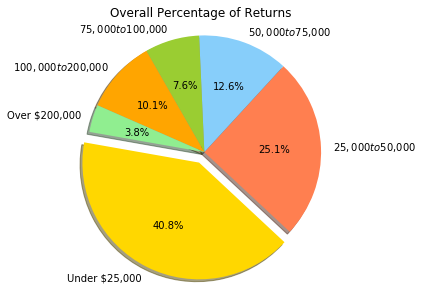

In [53]:
# Question 11 graph.
# Total percentage returns chart - FIX CHART LABELS ON DISPLAY

plt.figure(figsize=(5,5))
labels=Florida_tax_amount_p["Size of adjusted gross income"].values.tolist()
fares=Florida_tax_amount_p["Percentage of returns"].values.tolist()

explode=(0.1, 0, 0, 0, 0, 0)
colors=["gold", "coral", "lightskyblue", "yellowgreen", "orange", "lightgreen"]

plt.title("Overall Percentage of Returns")
plt.pie(Florida_tax_amount_p["Percentage of returns"], explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis('equal')
plt.savefig("Overall_Percentages.png")
plt.show()

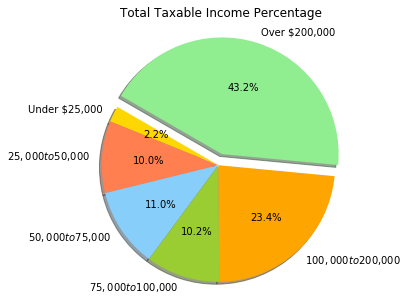

In [54]:
# Question 11 graph.
# Total taxable income chart

plt.figure(figsize=(5,5))
labels=Florida_tax_amount_p["Size of adjusted gross income"].values.tolist()
fares=Florida_tax_amount_p["Taxable income: Percentage"].values.tolist()

explode=(0, 0, 0, 0, 0, 0.1)
colors=["gold", "coral", "lightskyblue", "yellowgreen", "orange", "lightgreen"]

plt.title("Total Taxable Income Percentage")
plt.pie(Florida_tax_amount_p["Taxable income: Percentage"], explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=150)

plt.axis('equal')
plt.savefig("Taxable_Income_Percentage.png")
plt.show()

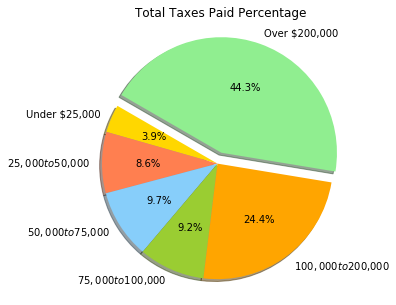

In [55]:
#Question 11 graph.
#Total taxes paid percentage chart.

plt.figure(figsize=(5,5))
labels=Florida_tax_amount_p["Size of adjusted gross income"].values.tolist()
fares=Florida_tax_amount_p["Total taxes paid: Percentage"].values.tolist()

explode=(0, 0, 0, 0, 0, 0.1)
colors=["gold", "coral", "lightskyblue", "yellowgreen", "orange", "lightgreen"]

plt.title("Total Taxes Paid Percentage")
plt.pie(Florida_tax_amount_p["Total taxes paid: Percentage"], explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=150)

plt.axis('equal')
plt.savefig("Taxes_Paid_Percentage.png")
plt.show()

In [56]:
# Question 12. 
# Compare total income to total taxable income across the brackets


Florida_cities_total=Florida_cities.groupby(["Size of adjusted gross income"], sort=False).sum().reset_index()
Florida_cities_total=Florida_cities_total.sum()
Florida_cities_total["City"]="Total"
Florida_cities_total=Florida_cities_total[["City", "Number of returns",  \
                        "Taxable income: Amount", "Total taxes paid: Amount"]]

Income_compare=Florida_cities.groupby(["Size of adjusted gross income"], sort=False).sum().reset_index()
Income_compare=Income_compare[[ \
"Size of adjusted gross income", "Total income: Amount", "Taxable income: Amount", "Total taxes paid: Amount"]]
Income_compare["Percentage of taxable income"]=( \
            Income_compare["Taxable income: Amount"]/Income_compare["Total income: Amount"])
Income_compare["Percentage of non-taxable income"]=1-Income_compare["Percentage of taxable income"]
Income_compare["Percentage of income taxed"]=(  \
            Income_compare["Total taxes paid: Amount"]/Income_compare["Taxable income: Amount"])

Income_compare

,Size of adjusted gross income,Total income: Amount,Taxable income: Amount,Total taxes paid: Amount,Percentage of taxable income,Percentage of non-taxable income,Percentage of income taxed
0,Under $25000,50167659,9385768,611185,0.187088,0.812912,0.065118
1,$25000 to $50000,84929165,42261006,1339918,0.497603,0.502397,0.031706
2,"$50,000 to $75,000",72539100,46707477,1512749,0.643894,0.356106,0.032388
3,"$75,000 to $100,000",61594575,43382475,1446640,0.704323,0.295677,0.033346
4,"$100,000 to $200,000",129097708,99199178,3810276,0.768404,0.231596,0.038410
5,"Over $200,000",208787183,182961985,6926832,0.876309,0.123691,0.037859


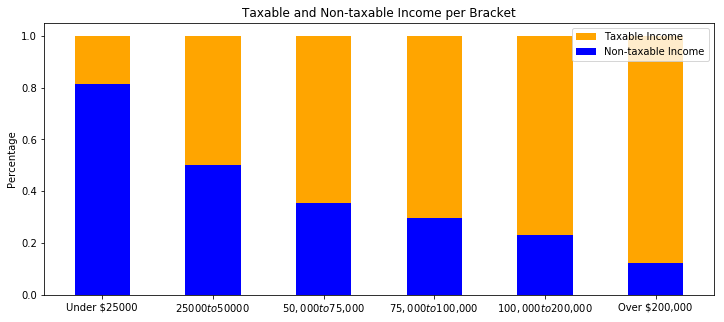

In [30]:
# Question 12 Graph
# Taxable vs non-taxable income

plt.figure(figsize=(12,5))
tax=plt.bar(Income_compare["Size of adjusted gross income"],  \
        Income_compare["Percentage of taxable income"], color="orange", width=0.5, \
        bottom=Income_compare["Percentage of non-taxable income"])

nontax=plt.bar(Income_compare["Size of adjusted gross income"],  \
        Income_compare["Percentage of non-taxable income"], color="blue", width=0.5)

plt.title("Taxable and Non-taxable Income per Bracket")
plt.ylabel("Percentage")
plt.legend((tax[0], nontax[0]), ("Taxable Income", "Non-taxable Income"), loc="upper right")
plt.savefig("Taxed vs Nontaxed")
plt.show()

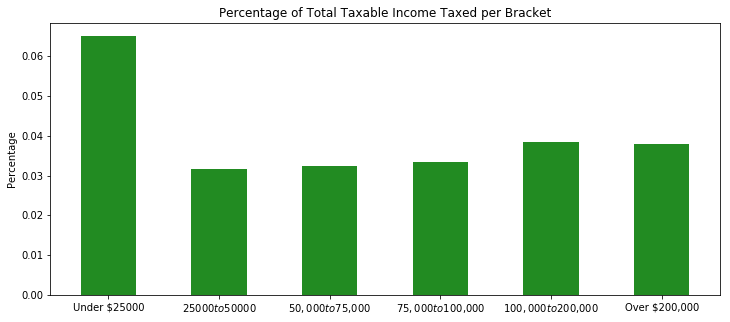

In [31]:
# Question 12 Graph
# Total taxable income taxed per bracket.

plt.figure(figsize=(12,5))
Income_tax=plt.bar(Income_compare["Size of adjusted gross income"], \
        Income_compare["Percentage of income taxed"], color="forestgreen", width=0.5)

plt.title("Percentage of Total Taxable Income Taxed per Bracket")
plt.ylabel("Percentage")
plt.savefig("Income Taxed per Bracket")
plt.show()

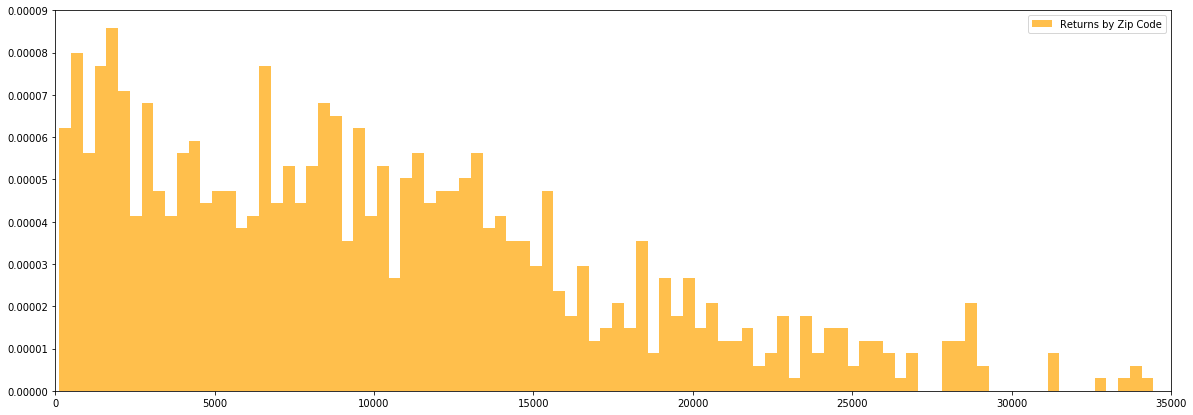

In [59]:
#Question 13.  Statistical analysis - compare city to zip code number of returns
# Zip Code Histogram.  

#Ho:  City and Zip code returns have the same distribution
#Ha:  City and Zip Code returns do not have the same distribution


Zip_sum=Florida_complete.groupby(["Zip Code"]).sum().reset_index()

plt.figure(figsize=(20,7))
Zip_sum_graph=plt.hist( \
Zip_sum["Number of returns"], 100, density=True, alpha=0.7, label="Returns by Zip Code", color="orange"
)



plt.xlim((0,35000))
plt.legend()
plt.show()

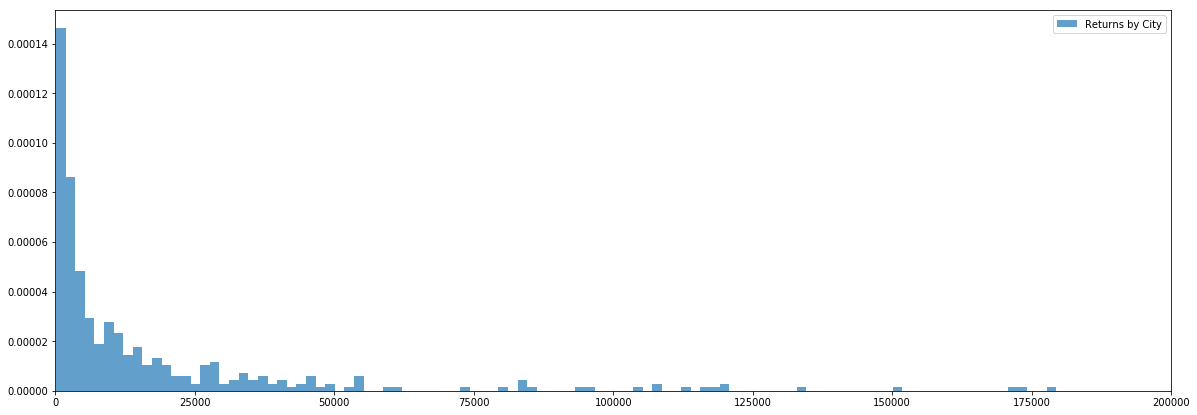

In [57]:
#Question 13.
#City histogram

City_sum=Florida_complete.groupby(["City"]).sum().reset_index()

plt.figure(figsize=(20,7))
City_sum_graph=plt.hist(  \
    City_sum["Number of returns"], 500, density=True, alpha=0.7, label="Returns by City")
plt.xlim((0,200000))
plt.legend()
plt.show()

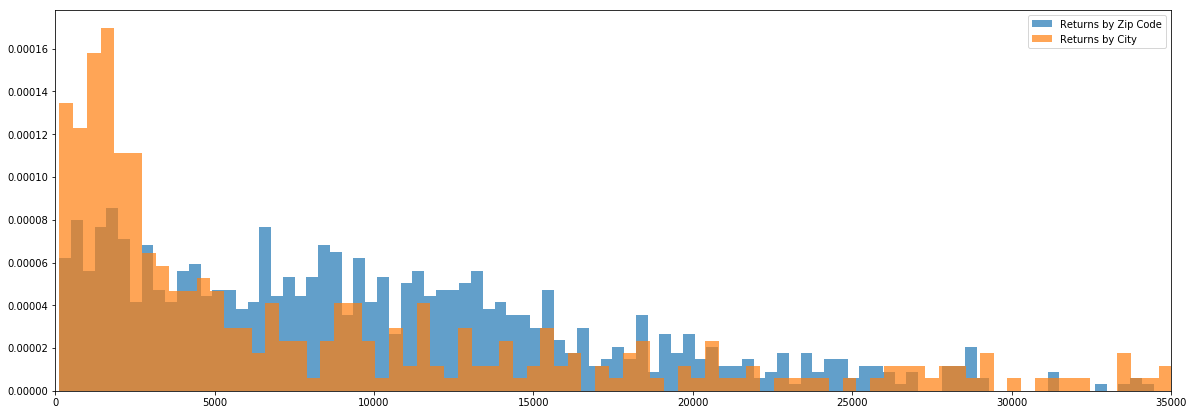

In [60]:
# Question 13.
# Combined Histogram  - Just use this graph.

plt.figure(figsize=(20,7))
Zip_sum_graph=plt.hist( \
     Zip_sum["Number of returns"], 100, density=True, alpha=0.7, label="Returns by Zip Code")


City_sum_graph=plt.hist(  \
    City_sum["Number of returns"], 2000, density=True, alpha=0.7, label="Returns by City")



plt.xlim((0,35000))
plt.legend()
plt.show()

In [62]:
# Question 13.
# Testing the null hypothesis.
# Reject null hypothesis.  City and Zip code returns have different distributions.

Zip_stats=Zip_sum["Number of returns"]
City_stats=City_sum["Number of returns"]

stats.ttest_ind(City_stats, Zip_stats, equal_var=False)

Ttest_indResult(statistic=4.050761073397962, pvalue=6.132268215097436e-05)

In [78]:
Zip_stats=Zip_sum["Number of returns"]
Zip_stats.describe()

count      917.000000
mean     10162.453653
std       7392.335667
min        130.000000
25%       4160.000000
50%       8880.000000
75%      14260.000000
max      37030.000000
Name: Number of returns, dtype: float64

In [79]:
City_stats=City_sum["Number of returns"]
City_stats.describe()

count       397.000000
mean      23473.476071
std       65293.256512
min         130.000000
25%        1820.000000
50%        6050.000000
75%       19040.000000
max      861990.000000
Name: Number of returns, dtype: float64

In [122]:
#Find the City return distribution

#stats.kstest(City_stats, 'gamma', (50000, .01))
# r = pareto.rvs(20, size=1000)
# D, p_value = scipy.stats.kstest(r, City_stats)
#stats.kstest(City_stats, 'pareto', r)
# r

stats.kstest(City_stats, 'gamma', (2,.01))

KstestResult(statistic=1.0, pvalue=0.0)

In [125]:
#Find Zip Code return distribution

k1, p1 = stats.normaltest(Zip_stats)
p1

8.673847024489966e-20